In [1]:
#importing libraries

import pandas as pd
import pyspark
from pyspark.sql.types import *
from pyspark.sql.functions import *

In [21]:
#loading synthetic data from s3
filepath = "s3a://geo-project-data/sample_data/sample_geo.txt"
df =spark.read.option("delimiter", "\t").csv(filepath,header=True)
df.show()

+-----------+------------+----------+
|   Latitude|   Longitude|LocationID|
+-----------+------------+----------+
|37.77253945|-77.49954987|         1|
|42.09013298|-87.68915558|         2|
|39.56341754|-75.58753204|         3|
|39.45302347|-87.69374084|         4|
| 38.9537989|-77.01656342|         5|
|39.90031211|-75.74486542|         6|
|36.24009843|-115.1586914|         7|
|26.11330818|-80.09202576|         8|
|34.27036086|-118.3162918|         9|
|38.81664153|-97.62573242|        10|
|33.67614531|-118.1892776|        11|
|28.74612042|-81.44248199|        12|
|38.35152702|-81.69611359|        13|
|39.57271402|-86.35784912|        14|
|30.19543489|-81.45937347|        15|
|40.49826888|-74.16846466|        16|
|34.05601838|-117.9957428|        17|
|38.14426403|-122.5368347|        18|
|38.92940099|-94.39599609|        19|
|39.51639552|-77.81656647|        20|
+-----------+------------+----------+
only showing top 20 rows



# Visualization

In [25]:
#converting to pandas dataframe
df_pd = df.toPandas()

In [10]:
df_pd.head()

,Latitude,Longitude,LocationID
1,37.77253945,-77.49954987,1
2,42.09013298,-87.68915558,2
3,39.56341754,-75.58753204,3
4,39.45302347,-87.69374084,4
5,38.9537989,-77.01656342,5


In [11]:
#importing libraries for plotting
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import descartes

In [26]:
#converting latitude and longitude values to float..

latitude = []
longitude = []
for i,j in zip(df_pd.Latitude,df_pd.Longitude):
    latitude.append(float(i))
    longitude.append(float(j))

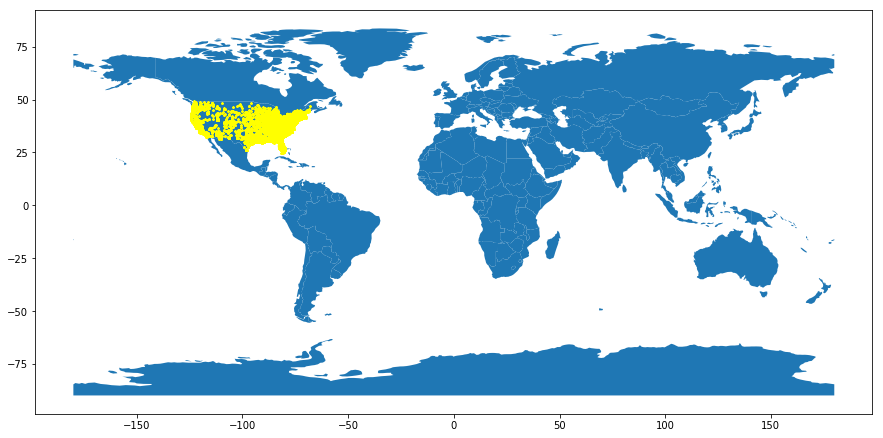

In [13]:
#plotting world map using geopandas

gdf = gpd.GeoDataFrame(df_pd, geometry=gpd.points_from_xy(longitude, latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(15,15))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='yellow',figsize=(15,15), marker='*', markersize=5)

plt.show()

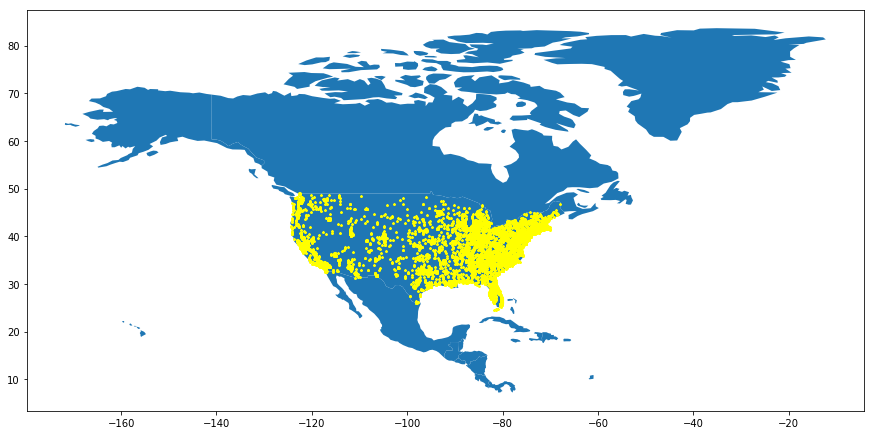

In [14]:
#united states map..

gdf = gpd.GeoDataFrame(df_pd, geometry=gpd.points_from_xy(longitude, latitude))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world[world.continent == 'North America'].plot(figsize=(15,15))

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='yellow',figsize=(15,15), marker='*', markersize=5)

plt.show()

In [24]:
#Save the extracted data to comma delimited text files in S3.

df.write.csv("s3a://geo-project-data/datafiles/synthetic", header = True)